In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_copy = pd.read_csv("fcc-forum-pageviews.csv",index_col="date")
df = df_copy
df_copy.head(3)

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716


### Cleaning

In [3]:
mask1 = (df["value"])>=(df["value"].quantile(.025))
mask2 = (df["value"])<=(df["value"].quantile(.975))
mask= (mask1) & (mask2)
(mask).sum()

1238

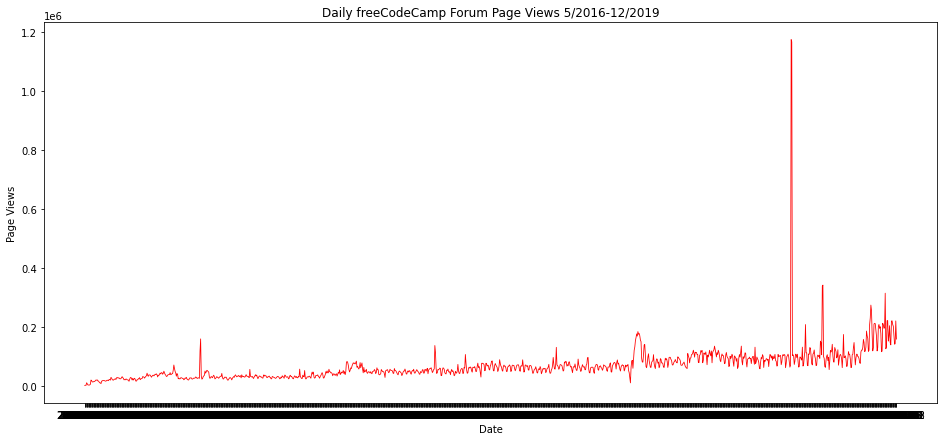

In [4]:
plt.figure(figsize=(16,7))
plt.plot(df["value"],"r",linewidth=0.8)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()


In [5]:
df["date"] = df.index
df["date"]=df["date"].str.split("-")
df["month"]=[x[1] for x in df["date"]]
df["year"]=[x[0] for x in df["date"]]
month_dict={"01":"January","02":"February","03":"March","04":"April","05":"May","06":"June","07":"July","08":"August","09":"September","10":"October","11":"November","12":"December"}
df.replace(to_replace=month_dict,inplace=True)
months = df["month"].unique()
years = df["year"].unique()
del df["date"]
sum_list = []
for year in years:
    for month in months:
        monthly_count={}
        mask1 = df["month"]==month
        mask2 = df["year"]==year
        mask = (mask1) & (mask2)
        sum_list.append([year,month,df[mask]["value"].sum()])
df_sum=pd.DataFrame(columns=["views","year","month"])
df_sum["views"]=[x[2] for x in sum_list]
df_sum["month"]=[x[1] for x in sum_list]
df_sum["year"]=[x[0] for x in sum_list]

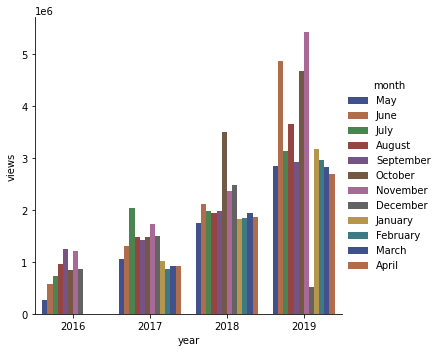

In [6]:
plot1 = sns.catplot(data=df_sum,kind="bar",x="year",y="views",hue="month",palette="dark",alpha=.8)

C:\Program Files\KMSpico\temp\ipykernel_12048\4239657181.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_ticks)


[Text(0, -200000.0, '0'),
 Text(0, 0.0, '20000'),
 Text(0, 200000.0, '40000'),
 Text(0, 400000.0, '60000'),
 Text(0, 600000.0, '80000'),
 Text(0, 800000.0, '100000'),
 Text(0, 1000000.0, '120000'),
 Text(0, 1200000.0, '140000'),
 Text(0, 1400000.0, '160000')]

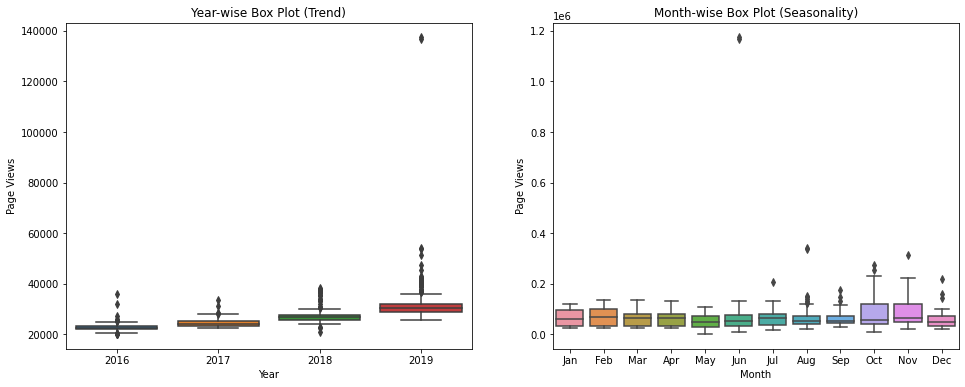

In [7]:

df_box = df.copy().rename(columns={"value": "views"})
df_box.reset_index(inplace=True)
df_box["date"] = pd.to_datetime(df_box["date"])

df_box["year"] = [d.year for d in df_box.date]
df_box["month"] = [d.strftime("%b") for d in df_box.date]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(ax=ax1, data=df_box, x=df_box["year"], y=df_box["views"])
ax1.set(
xlabel="Year", ylabel="Page Views", title="Year-wise Box Plot (Trend)"
)

sns.boxplot(
ax=ax2,
data=df_box,
x=df_box["month"],
y=df_box["views"],
order=[
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
],
)

ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
y_ticks = [
"0",
"20000",
"40000",
"60000",
"80000",
"100000",
"120000",
"140000",
"160000",
"180000",
"200000",
]
ax1.set_yticklabels(y_ticks)